# Evaluacion final

# Setup

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
from sklearn import metrics
from tensorflow import keras
import joblib

# Importar modelo

In [2]:
model = joblib.load("RF_model.joblib")

# Importar datos de prueba

In [3]:
X_test = pd.read_csv("X_test.csv").to_numpy()
y_test = pd.read_csv("y_test.csv").to_numpy()
y_test = np.ravel(y_test)

## Evaluacion de modelo.

In [7]:
print("Test set score: {:.4f}".format(model.score(X_test, y_test)))

Test set score: 0.9051


## Matriz de confusion

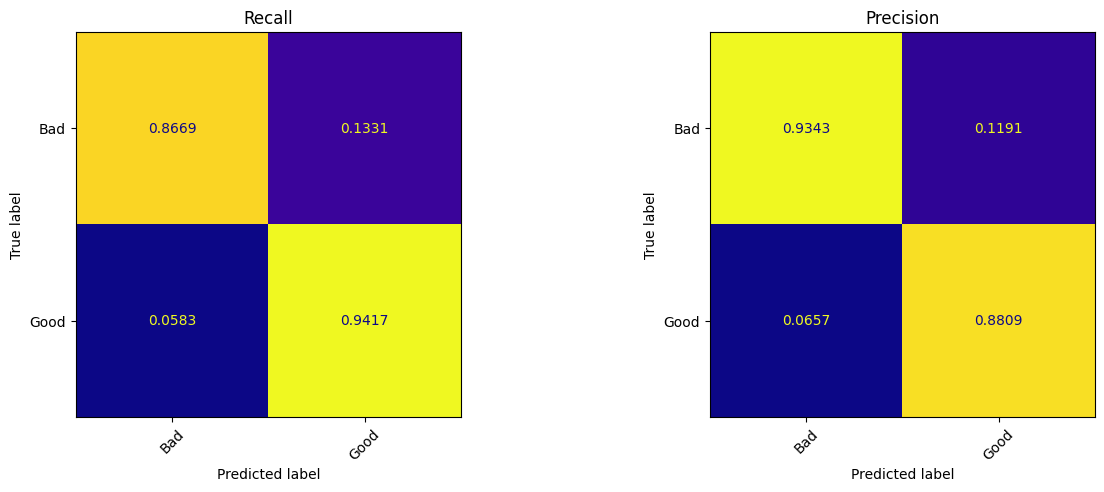

In [5]:
labels = ["Bad","Good"]
y_pred = model.predict(X_test)
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
ConfusionMatrixDisplay.from_predictions(y_test,  y_pred, display_labels = labels, 
                                        normalize = "true", xticks_rotation = 45, 
                                        values_format = ".4f", ax = ax[0], cmap = 'plasma', colorbar = False)
ax[0].set_title('Recall')
ax[0].grid(False)
ConfusionMatrixDisplay.from_predictions(y_test,  y_pred, display_labels = labels, 
                                        normalize = "pred", xticks_rotation = 45, 
                                        values_format = ".4f", ax = ax[1], cmap = 'plasma', colorbar = False)
ax[1].set_title('Precision')
ax[1].grid(False)

## Reporte de clasificacion

In [6]:
report = classification_report(y_test, y_pred, target_names = labels, digits = 4)
print(report)

              precision    recall  f1-score   support

         Bad     0.9343    0.8669    0.8994    209386
        Good     0.8809    0.9417    0.9103    218805

    accuracy                         0.9051    428191
   macro avg     0.9076    0.9043    0.9048    428191
weighted avg     0.9070    0.9051    0.9050    428191



# Analisis de resultados

El modelo Random Forests posee un rendimiento en terminos de presicion y recall ligeramente balanceado. Sin embargo, la evaluacion usando la metrica f1-score, el modelo posee una mayor capacidad para identificar buenos clientes con un 91.03 % de las veces. 

# Conclusion
En una tienda ratail para identificar buenos clientes y ofrecer descuentos personalizados, el modelo random forest desarrollado es lo suficientemente preciso con el 90.51 % de las veces que se utiliza para identificar buenos clientes. 

# Sugerencias

1. A partir de los datos analizados y los resultados obtenidos el modelo Random Forest tiene el potencial para llevarlo a produccion, evaluar nuevos resultados y monitorear el rendimiento.
2. Las variables de identificacion unica (ID) pueden ser utlizadas para la ingenieria de caracteristicas y hacer el modelo mas preciso.